<a href="https://colab.research.google.com/github/Jesus-Manuel-Huerta-Najera/CarPrice/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jesus Manuel Huerta Najera IDGS91**

## **Objetivo:**

Se pretende analizar los datos para poder encontrar la relación entre los distintos atributos, con relación del costo.

Para ello se realizarán algunas pruebas dentro del análisis para poder determinar y llegar a una conclusión 

# **Conclusión**

Después de realizar el análisis de los datos se puede ver y apreciar las columnas que tienen una mayor correlación, estas fueron de utilidad del último paso para poder ver gráficamente su relación, así como la relación con respecto al costo, también se analizaron todos los datos, podemos llegar a la conclusión que el precio del automóvil depende más de tamaño, peso, tamaño del motor, esto puede influir en el costo final.

También se llevó un gran aprendizaje en técnicas de graficado, así como de análisis de datos gracias a esta actividad, ya habíamos visto algo similar en actividades anteriores, pero se profundizo más dentro de esta y lo que más destaco es la recolección de columnas por tipo, así como las que tienen una mayor correlación que me resultan muy importantes para el análisis de los datos.

# **Análisis de los datos**

# Importar librerias

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stas

# Cargamos los datos

In [35]:
dataframe = pd.read_csv("car_price_assignment.csv")

#Se revisa los datos

In [36]:
dataframe.shape

(205, 26)

podemos ver la cantidad de columnas y filas

# Visualizamos el tipo de datos

Con esto podemos filtrar las columnas que vamos a necesitar

In [37]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Verificamos que no tenga valores nulos

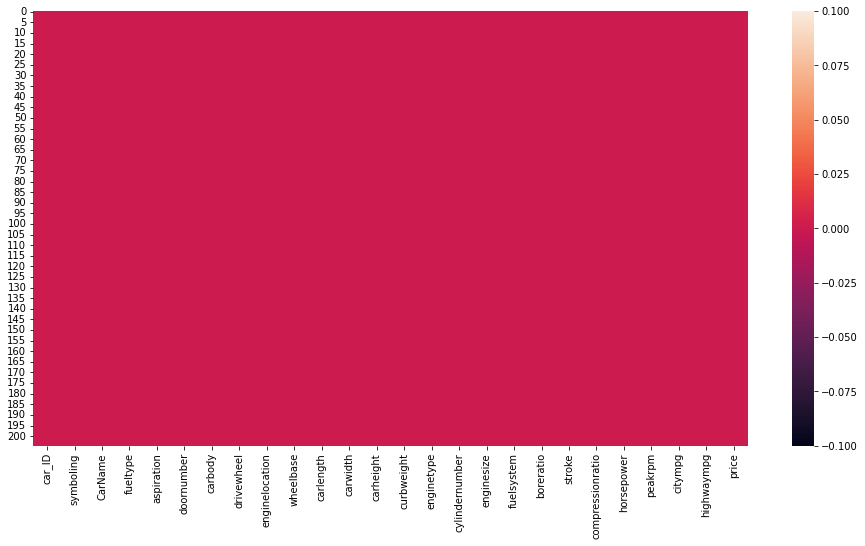

In [38]:
plt.figure(figsize=(16,8))
sns.heatmap(dataframe.isnull())
plt.show()

# Guardamos las columnas que no sean numericas

In [39]:
def categoria(dataframe):
  categorical_col = []
  for col in dataframe:
    if dataframe[col].dtype == 'object':
      categorical_col.append(col)
  return categorical_col
nonum = categoria(dataframe)
nonum

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

# Guardamos las columnas que sean solo numericas

In [40]:
def categoriaNum(dataframe):
  categorical_col = []
  for col in dataframe:
    if dataframe[col].dtype != 'object':
      categorical_col.append(col)
  return categorical_col
numerico = categoriaNum(dataframe)
numerico

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

# Revisamos el promedio, media y moda

In [41]:
cols = numerico
cols.remove('car_ID')
cols.remove('price')
for c in cols:
  print("Columna {} : Mean{}".format(c,dataframe[c].mean()))
  print("Columna {} : Mean{}".format(c,dataframe[c].median()))
  print("Columna {} : Mean{}".format(c,dataframe[c].mode()))

Columna symboling : Mean0.8341463414634146
Columna symboling : Mean1.0
Columna symboling : Mean0    0
dtype: int64
Columna wheelbase : Mean98.75658536585378
Columna wheelbase : Mean97.0
Columna wheelbase : Mean0    94.5
dtype: float64
Columna carlength : Mean174.04926829268305
Columna carlength : Mean173.2
Columna carlength : Mean0    157.3
dtype: float64
Columna carwidth : Mean65.90780487804875
Columna carwidth : Mean65.5
Columna carwidth : Mean0    63.8
dtype: float64
Columna carheight : Mean53.724878048780525
Columna carheight : Mean54.1
Columna carheight : Mean0    50.8
dtype: float64
Columna curbweight : Mean2555.5658536585365
Columna curbweight : Mean2414.0
Columna curbweight : Mean0    2385
dtype: int64
Columna enginesize : Mean126.90731707317073
Columna enginesize : Mean120.0
Columna enginesize : Mean0     92
1    122
dtype: int64
Columna boreratio : Mean3.3297560975609772
Columna boreratio : Mean3.31
Columna boreratio : Mean0    3.62
dtype: float64
Columna stroke : Mean3.25541

# Se visualiza la correlación

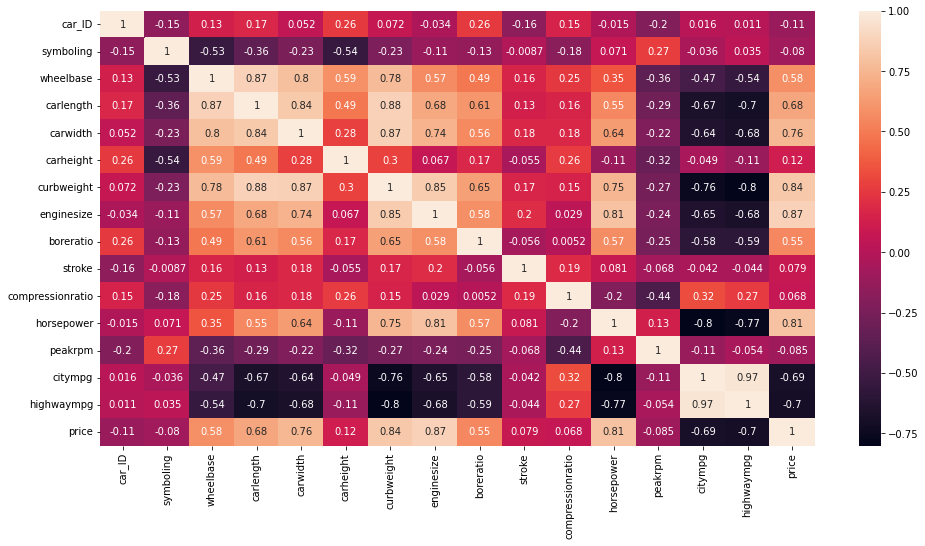

In [42]:
plt.figure(figsize=(16,8))
sns.heatmap(dataframe.corr(),annot=True)
plt.show()

# Vemos las columnas con una mejor correlación 

In [56]:
def correlation(dataframe,threshold):
  cols_corr = set()
  corr_matrix = dataframe.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        col_name = corr_matrix.columns[i]
        cols_corr.add(col_name)
  return cols_corr

correlacion = correlation(dataframe.iloc[:,:-1], 0.85)
correlacion


{'carlength', 'curbweight', 'enginesize', 'highwaympg'}

In [57]:
relacion = []
for e in correlacion:
  relacion.append(e)

relacion

['curbweight', 'highwaympg', 'enginesize', 'carlength']

# Se grafica cada columna y su relación con el precio

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

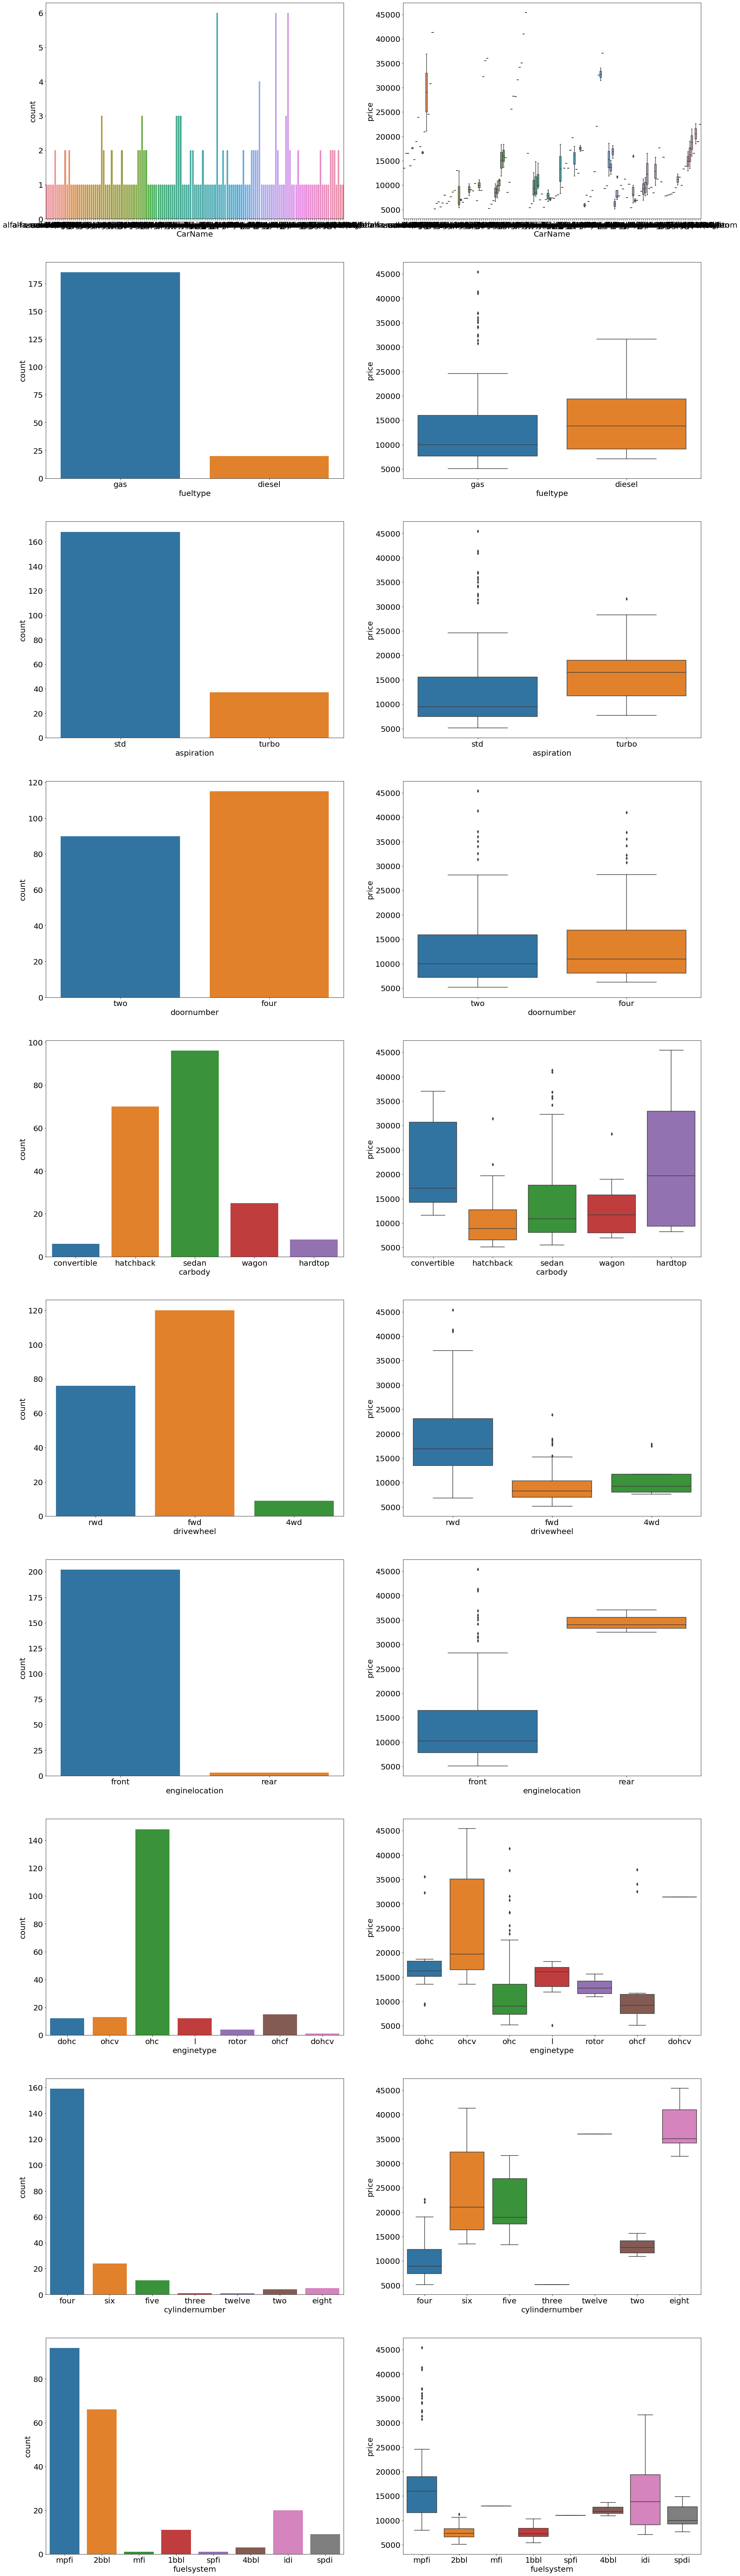

In [60]:
i = 1
plt.figure(figsize=(30,120))
for col in nonum:
  plt.subplot(len(nonum),2,i)
  sns.countplot(dataframe[col])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count", fontsize=20)
  i= i+1

  #box plot

  plt.subplot(len(nonum),2,i)

  sns.boxplot(dataframe[col],y=dataframe['price'])

  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("price", fontsize=20)

  i = i+1

# Se grafica cada columna que tiene mayor correlación y su relación con el precio

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

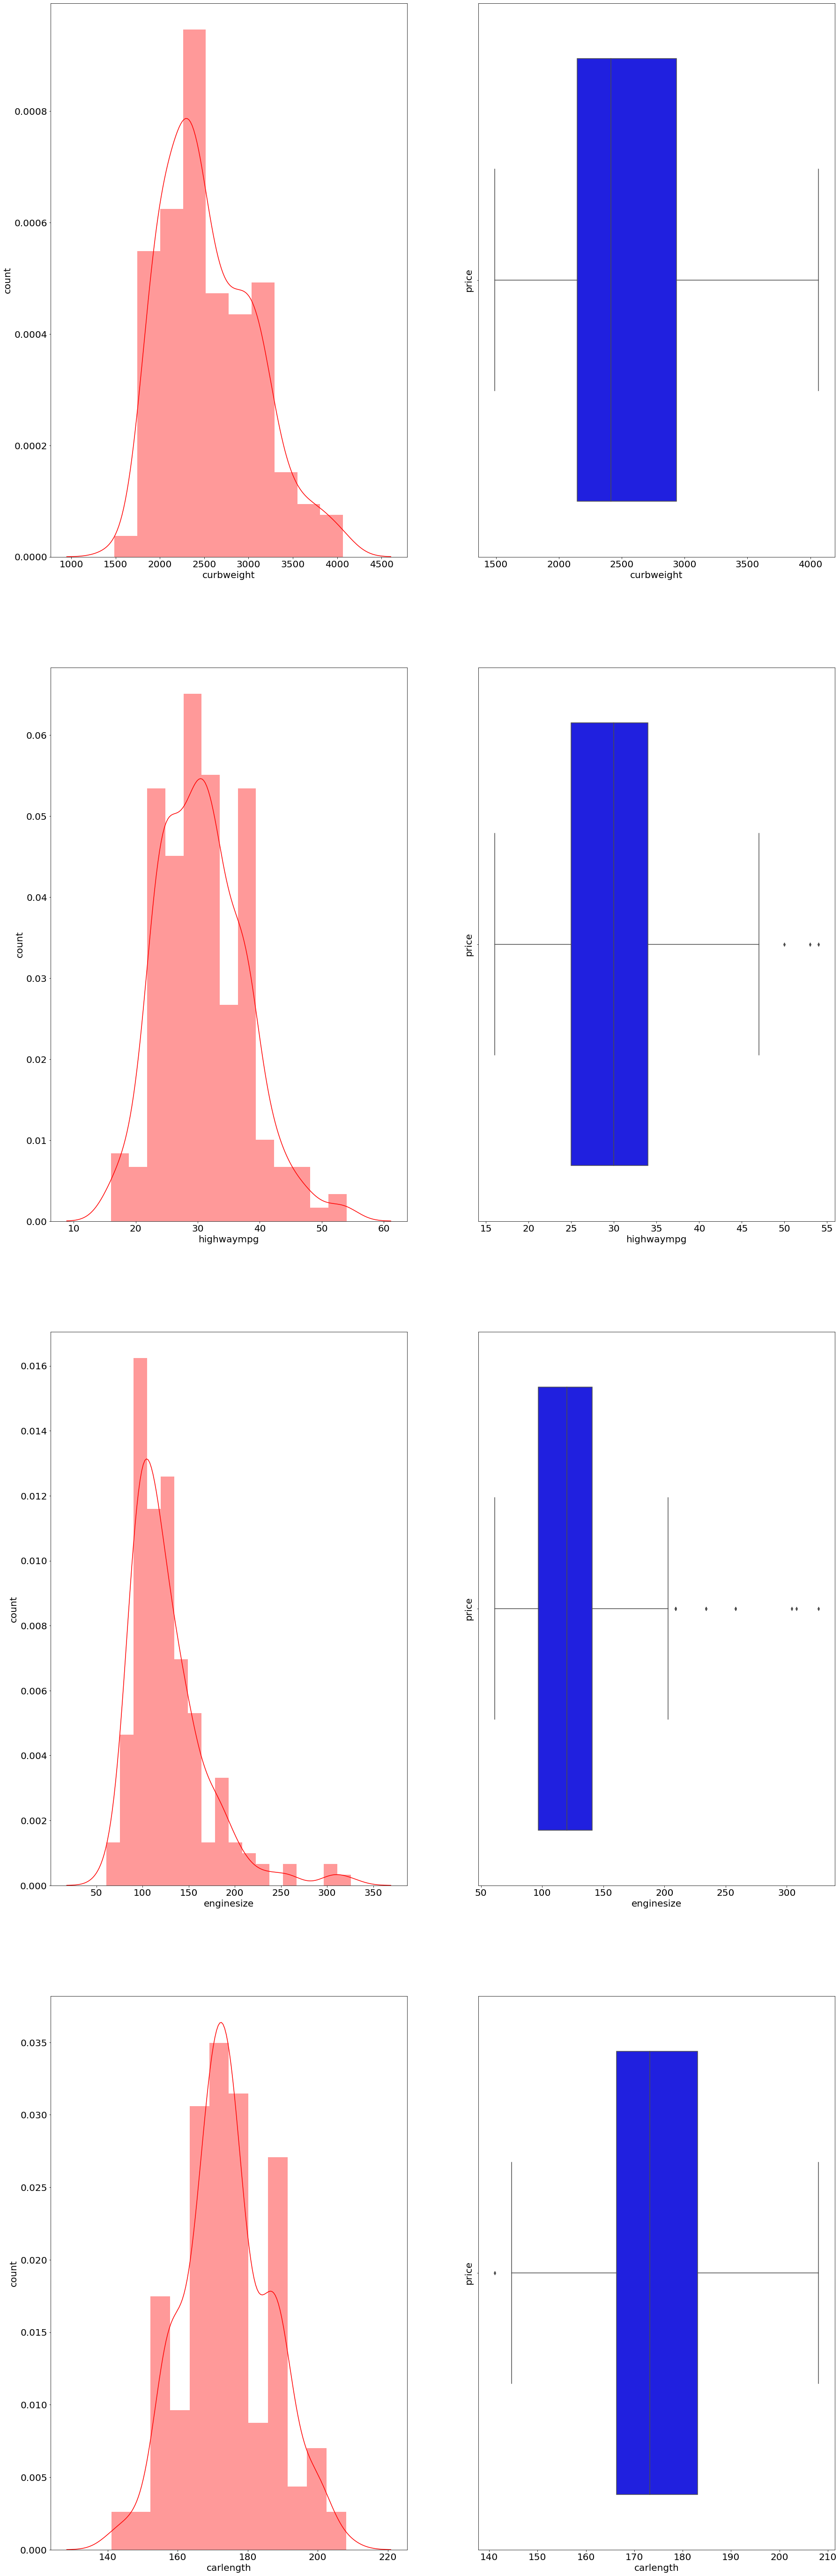

In [58]:
i=1
plt.figure(figsize=(30,100))
for col in relacion:
  plt.subplot(len(relacion),2,i)
  sns.distplot(dataframe[col],color='red')
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count", fontsize=20)
  i = i+1
  plt.subplot(len(relacion),2,i)
  sns.boxplot(dataframe[col],color='blue')
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("price", fontsize=20)
  i = i+1
plt.show()